# Classification methods and Dimensionality Reduction

1.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA

# Load the dataset
df = pd.read_csv('Thyloid.csv')

# Assuming 'Label' is the column containing the target labels
label_column = 'Label'

# Drop rows with missing values
df = df.dropna()

# Separate features and labels
X = df.drop(label_column, axis=1)
y = df[label_column]

# Ensure the data is not empty after dropping NAs
if X.empty or y.empty:
    raise ValueError("The dataset is empty after dropping missing values.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets (for verification)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (459, 1881)
Testing data shape: (115, 1881)


In [44]:
# Function to apply PCA and KPCA models on Test dataset using parameters from Train dataset
def apply_pca_kpca_test(X_test, pca_model, kpca_models):
    # PCA
    X_test_pca = pca_model.transform(X_test)

    # KPCA
    kpca_results = {}
    for kernel, kpca_model in kpca_models.items():
        X_test_kpca = kpca_model.transform(X_test)
        kpca_results[kernel] = X_test_kpca

    return {
        'PCA': X_test_pca,
        'KPCA_RBF': kpca_results['KPCA_RBF'],
        'KPCA_Poly': kpca_results['KPCA_Poly'],
        'KPCA_Linear': kpca_results['KPCA_Linear']
    }

try:
    # Train PCA on Training dataset
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train)

    # Train KPCA models on Training dataset
    kpca_rbf = KernelPCA(n_components=10, kernel='rbf')
    X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)

    kpca_poly = KernelPCA(n_components=10, kernel='poly')
    X_train_kpca_poly = kpca_poly.fit_transform(X_train)

    kpca_linear = KernelPCA(n_components=10, kernel='linear')
    X_train_kpca_linear = kpca_linear.fit_transform(X_train)

    # Store KPCA models for later use on Test dataset
    kpca_models = {
        'KPCA_RBF': kpca_rbf,
        'KPCA_Poly': kpca_poly,
        'KPCA_Linear': kpca_linear
    }

    # Apply PCA and KPCA on Test dataset
    transformed_test_data = apply_pca_kpca_test(X_test, pca, kpca_models)

    # Example output check
    for method, test_data in transformed_test_data.items():
        print(f"{method} Test shape: {test_data.shape}")

except ValueError as ve:
    print(f"ValueError occurred: {ve}")

except Exception as e:
    print(f"An error occurred: {e}")


ValueError occurred: zero-size array to reduction operation maximum which has no identity


2

In [17]:
import numpy as np

# Calculate the covariance matrix
cov_matrix = np.cov(X.T)

# Sum the absolute values of covariances for each feature
cov_sums = np.sum(np.abs(cov_matrix), axis=0)

# Identify the indices of the top 10 features with the highest covariance values
top_10_features_indices = np.argsort(cov_sums)[-10:][::-1]

# Extract the feature names
top_10_feature_names = X.columns[top_10_features_indices]

print("Covariance Matrix:")
print(cov_matrix)

print("\nTop 10 Features with the Highest Covariance Values:")
for i, feature in enumerate(top_10_feature_names, 1):
    print(f"{i}. {feature}")


Covariance Matrix:
[[ 8.36571928e+07  8.35815806e+07  8.36528943e+07 ...  1.14865353e+05
   1.13015855e+06 -3.25471658e+07]
 [ 8.35815806e+07  8.35136653e+07  8.35807096e+07 ...  1.14595769e+05
   1.13625539e+06 -3.24889938e+07]
 [ 8.36528943e+07  8.35807096e+07  8.36559715e+07 ...  1.14895881e+05
   1.12739199e+06 -3.24740152e+07]
 ...
 [ 1.14865353e+05  1.14595769e+05  1.14895881e+05 ...  9.22077576e+02
   3.26073100e+03  1.25438903e+05]
 [ 1.13015855e+06  1.13625539e+06  1.12739199e+06 ...  3.26073100e+03
   8.23763000e+05  4.46859224e+06]
 [-3.25471658e+07 -3.24889938e+07 -3.24740152e+07 ...  1.25438903e+05
   4.46859224e+06  6.50152135e+08]]

Top 10 Features with the Highest Covariance Values:
1. hsa-mir-21
2. hsa-mir-143
3. hsa-mir-30a
4. hsa-mir-22
5. hsa-mir-148a
6. hsa-mir-146b
7. hsa-mir-99b
8. hsa-mir-30e
9. hsa-mir-182
10. hsa-let-7a-3


3.

3.a

KNN Classifier:
Accuracy: 0.5478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.97      0.72        65
           2       1.00      0.00      0.00        12
           3       0.00      0.00      0.00        25
           4       1.00      0.00      0.00        11

    accuracy                           0.55       115
   macro avg       0.52      0.19      0.14       115
weighted avg       0.53      0.55      0.41       115



Naive Bayes (sklearn) Classifier:
Accuracy: 0.2956521739130435
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.48      0.35      0.41        65
           2       0.06      0.08      0.07        12
           3       0.24      0.40      0.30        25
           4       0.00      0.00      0.00        11

    accuracy                 

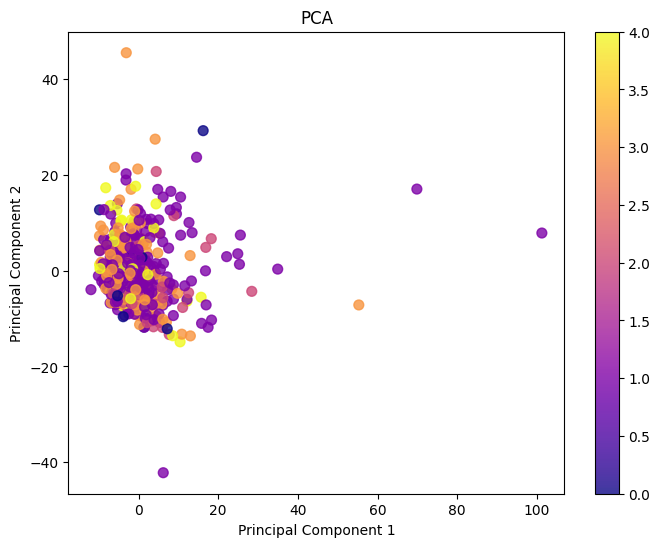

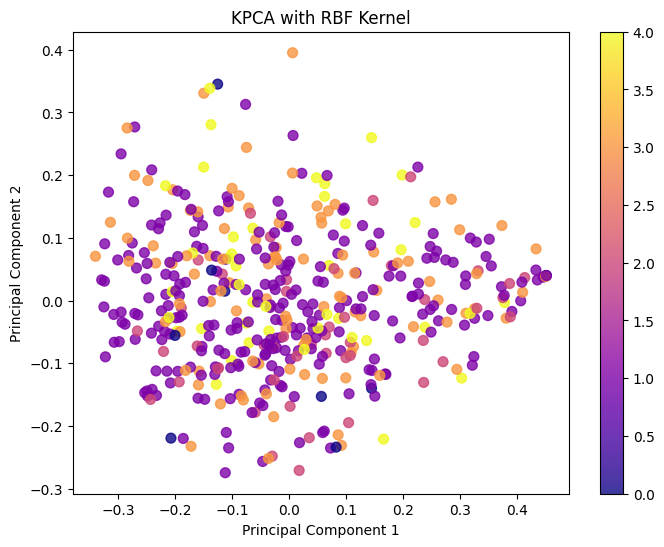

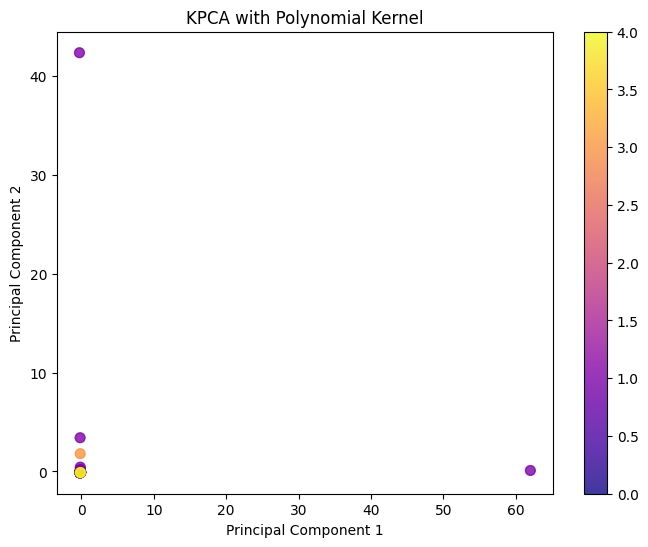

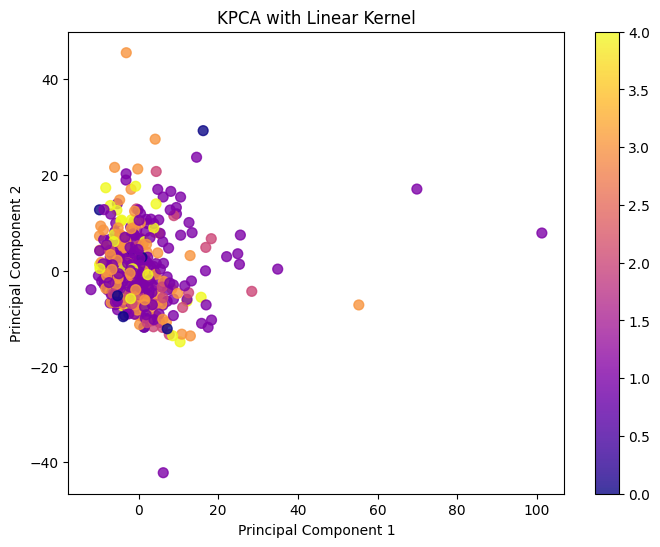

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA, KernelPCA

# Load the dataset
file_path = 'Thyloid.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Remove constant features
constant_features = np.where(np.var(X, axis=0) == 0)[0]
X = np.delete(X, constant_features, axis=1)

# Stratified split to handle imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class GaussianBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0) + 1e-6  # Add epsilon to variance to avoid division by zero
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx] + 1e-6)  # Add epsilon to avoid log(0)
            class_conditional = np.sum(np.log(self._pdf(idx, x) + 1e-6))  # Add epsilon to avoid log(0)
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

# Instantiate the classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (sklearn)": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', C=1),
    "Bayes (scratch)": GaussianBayes()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    print(f"{name} Classifier:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("\n")

# Perform PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform Kernel PCA with different kernels
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)

kpca_poly = KernelPCA(n_components=2, kernel='poly')
X_train_kpca_poly = kpca_poly.fit_transform(X_train)

kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train)

# Visualization of PCA and KPCA Results
def plot_scatter(X, y, title, cmap='viridis'):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=50, alpha=0.8)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

plot_scatter(X_train_pca, y_train, 'PCA', cmap='plasma')
plot_scatter(X_train_kpca_rbf, y_train, 'KPCA with RBF Kernel', cmap='plasma')
plot_scatter(X_train_kpca_poly, y_train, 'KPCA with Polynomial Kernel', cmap='plasma')
plot_scatter(X_train_kpca_linear, y_train, 'KPCA with Linear Kernel', cmap='plasma')


3.b.

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import warnings

# Load the dataset
file_path = 'Thyloid.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Suppress warnings about constant features and divide by zero
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Remove constant features using VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
X = selector.fit_transform(X)

# Stratified split to handle imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (sklearn)": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', C=1)
}

# Evaluate classifiers on different data configurations
def evaluate_dimension_reduction(X_train, X_test, y_train, y_test, classifiers):
    results = {}

    # Original Data
    results['Original'] = evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers)

    # PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    results['PCA'] = evaluate_classifiers(X_train_pca, X_test_pca, y_train, y_test, classifiers)

    # KPCA with RBF kernel
    kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
    X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
    X_test_kpca_rbf = kpca_rbf.transform(X_test)
    results['KPCA_RBF'] = evaluate_classifiers(X_train_kpca_rbf, X_test_kpca_rbf, y_train, y_test, classifiers)

    # KPCA with Polynomial kernel
    kpca_poly = KernelPCA(n_components=2, kernel='poly')
    X_train_kpca_poly = kpca_poly.fit_transform(X_train)
    X_test_kpca_poly = kpca_poly.transform(X_test)
    results['KPCA_Poly'] = evaluate_classifiers(X_train_kpca_poly, X_test_kpca_poly, y_train, y_test, classifiers)

    # KPCA with Linear kernel
    kpca_linear = KernelPCA(n_components=2, kernel='linear')
    X_train_kpca_linear = kpca_linear.fit_transform(X_train)
    X_test_kpca_linear = kpca_linear.transform(X_test)
    results['KPCA_Linear'] = evaluate_classifiers(X_train_kpca_linear, X_test_kpca_linear, y_train, y_test, classifiers)

    # Top 10 Features
    select_k_best = SelectKBest(f_classif, k=10)
    X_train_k_best = select_k_best.fit_transform(X_train, y_train)
    X_test_k_best = select_k_best.transform(X_test)
    results['Top_10_Features'] = evaluate_classifiers(X_train_k_best, X_test_k_best, y_train, y_test, classifiers)

    return results

# Function to evaluate classifiers on given data
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        results[name] = {
            'Accuracy': accuracy,
            'Classification_Report': report
        }
    return results

# Evaluate dimensionality reduction techniques
results = evaluate_dimension_reduction(X_train_std, X_test_std, y_train, y_test, classifiers)

# Print results
for reduction_type, reduction_results in results.items():
    print(f"---- {reduction_type} ----")
    for clf_name, clf_results in reduction_results.items():
        print(f"{clf_name} Classifier:")
        print(f"Accuracy: {clf_results['Accuracy']:.4f}")
        print("Classification Report:")
        print(clf_results['Classification_Report'])
        print("\n")


---- Original ----
KNN Classifier:
Accuracy: 0.5478
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.97      0.72        65
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        11

    accuracy                           0.55       115
   macro avg       0.12      0.19      0.14       115
weighted avg       0.33      0.55      0.41       115



Naive Bayes (sklearn) Classifier:
Accuracy: 0.2957
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.48      0.35      0.41        65
           2       0.06      0.08      0.07        12
           3       0.24      0.40      0.30        25
           4       0.00      0.00      0.00        11

    accuracy                      

3.c

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
file_path = 'Thyloid.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Remove constant features
constant_features = np.where(np.var(X, axis=0) == 0)[0]
X = np.delete(X, constant_features, axis=1)

# Stratified split to handle imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes (sklearn)": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', C=1),
    "Bayes (scratch)": GaussianBayes()  # Assuming you've implemented GaussianBayes
}

# Function to evaluate classifiers on different data configurations
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1)  # Handle zero division warning
        print(f"{name} Classifier:")
        print(f"Accuracy: {accuracy}")
        print("Classification Report:")
        print(report)
        print("\n")

# Evaluate classifiers on different data configurations
print("Whole Data:")
evaluate_classifiers(X_train_std, X_test_std, y_train, y_test, classifiers)

# PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("PCA Data:")
evaluate_classifiers(X_train_pca, X_test_pca, y_train, y_test, classifiers)

# KPCA with RBF kernel
kpca_rbf = KernelPCA(n_components=10, kernel='rbf')
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train_std)
X_test_kpca_rbf = kpca_rbf.transform(X_test_std)
print("KPCA RBF Data:")
evaluate_classifiers(X_train_kpca_rbf, X_test_kpca_rbf, y_train, y_test, classifiers)

# KPCA with Polynomial kernel
kpca_poly = KernelPCA(n_components=10, kernel='poly')
X_train_kpca_poly = kpca_poly.fit_transform(X_train_std)
X_test_kpca_poly = kpca_poly.transform(X_test_std)
print("KPCA Polynomial Data:")
evaluate_classifiers(X_train_kpca_poly, X_test_kpca_poly, y_train, y_test, classifiers)

# KPCA with Linear kernel
kpca_linear = KernelPCA(n_components=10, kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train_std)
X_test_kpca_linear = kpca_linear.transform(X_test_std)
print("KPCA Linear Data:")
evaluate_classifiers(X_train_kpca_linear, X_test_kpca_linear, y_train, y_test, classifiers)

# Top 10 Features
select_k_best = SelectKBest(f_classif, k=10)
X_train_kbest = select_k_best.fit_transform(X_train_std, y_train)
X_test_kbest = select_k_best.transform(X_test_std)
print("Top 10 Features Data:")
evaluate_classifiers(X_train_kbest, X_test_kbest, y_train, y_test, classifiers)


Whole Data:
KNN Classifier:
Accuracy: 0.5478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.97      0.72        65
           2       1.00      0.00      0.00        12
           3       0.00      0.00      0.00        25
           4       1.00      0.00      0.00        11

    accuracy                           0.55       115
   macro avg       0.52      0.19      0.14       115
weighted avg       0.53      0.55      0.41       115



Naive Bayes (sklearn) Classifier:
Accuracy: 0.2956521739130435
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.48      0.35      0.41        65
           2       0.06      0.08      0.07        12
           3       0.24      0.40      0.30        25
           4       0.00      0.00      0.00        11

    accuracy     

3.d.

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
file_path = 'Thyloid.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Assuming the last column is the target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Remove constant features
constant_features = np.where(np.var(X, axis=0) == 0)[0]
X = np.delete(X, constant_features, axis=1)

# Stratified split to handle imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes (sklearn)": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', C=1)
}

# Function to evaluate classifiers on different data configurations
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1)  # Handle zero division warning
        results[name] = {
            'accuracy': accuracy,
            'classification_report': report
        }
    return results

# Evaluate classifiers on different data configurations
def evaluate_data_configurations(X_train_std, X_test_std, y_train, y_test):
    configurations = {
        'Whole Data': (X_train_std, X_test_std),
        'PCA Data': (reduce_data_by_pca(X_train_std, X_test_std)),
        'KPCA RBF Data': (reduce_data_by_kpca(X_train_std, X_test_std, kernel='rbf')),
        'KPCA Polynomial Data': (reduce_data_by_kpca(X_train_std, X_test_std, kernel='poly')),
        'KPCA Linear Data': (reduce_data_by_kpca(X_train_std, X_test_std, kernel='linear')),
        'Top 10 Features Data': (reduce_data_by_top_features(X_train_std, X_test_std))
    }

    results = {}
    for config_name, (X_train_config, X_test_config) in configurations.items():
        results[config_name] = evaluate_classifiers(X_train_config, X_test_config, y_train, y_test, classifiers)

    return results

# PCA reduction function
def reduce_data_by_pca(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# KPCA reduction function
def reduce_data_by_kpca(X_train, X_test, kernel='rbf', n_components=10):
    kpca = KernelPCA(n_components=n_components, kernel=kernel)
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    return X_train_kpca, X_test_kpca

# Feature selection function
def reduce_data_by_top_features(X_train, X_test, k=10):
    select_k_best = SelectKBest(f_classif, k=k)
    X_train_kbest = select_k_best.fit_transform(X_train, y_train)
    X_test_kbest = select_k_best.transform(X_test)
    return X_train_kbest, X_test_kbest

# Evaluate different data configurations
results = evaluate_data_configurations(X_train_std, X_test_std, y_train, y_test)

# Print and compare results
for config_name, classifiers_results in results.items():
    print(f"Evaluation results for {config_name}:")
    for clf_name, metrics in classifiers_results.items():
        print(f"{clf_name} Classifier:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['classification_report'])
        print("\n")


Evaluation results for Whole Data:
KNN Classifier:
Accuracy: 0.5478
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.97      0.72        65
           2       1.00      0.00      0.00        12
           3       0.00      0.00      0.00        25
           4       1.00      0.00      0.00        11

    accuracy                           0.55       115
   macro avg       0.52      0.19      0.14       115
weighted avg       0.53      0.55      0.41       115



Naive Bayes (sklearn) Classifier:
Accuracy: 0.2957
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.48      0.35      0.41        65
           2       0.06      0.08      0.07        12
           3       0.24      0.40      0.30        25
           4       0.00      0.00      0.00        11

    accuracy      